# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [138]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
import pandas as pd

path = 'water_potability.csv'

df = pd.read_csv(path)

print(df.shape)
print(df.head())


(3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


Cleaning up data

In [139]:

# clean datas with Nan values

# Droping delete many rows => not good
df = df.dropna(inplace=False)

# Fill with mean => best option
# df = df.fillna(df.mean(), inplace=False)
df = df.drop_duplicates(inplace=False)

print(df.shape)
print(df.head())

(2011, 10)
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  


In [140]:
#  print data shape where potability is 0
print(df[df['Potability'] == 0].shape)

#  print data shape where potability is 1
print(df[df['Potability'] == 1].shape)


(1200, 10)
(811, 10)


## Data Visualisation

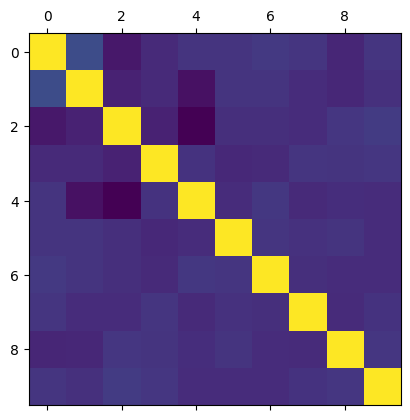

In [141]:
from matplotlib import pyplot as plt

# plot data
#  ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
#  0, 1,       2,     3,          4,      5,            6,              7,              8,        9
#  plot heatmap
plt.matshow(df.corr())
plt.show()

Text(0, 0.5, 'Hardness')

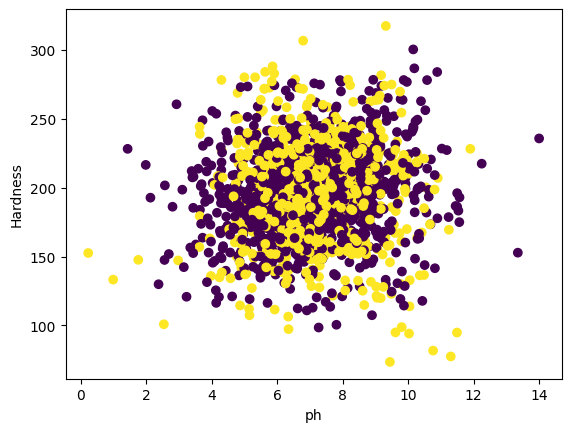

In [142]:
# Plot the values based on the potability => 0 or 1
plt.scatter(df['ph'], df['Hardness'], c=df['Potability'])
plt.xlabel('ph')
plt.ylabel('Hardness')

In [143]:
# plot all columns on a bar chat
# df.plot(kind='bar')

### Scaling data

In [144]:
# scaling data to values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_scaled.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.587349  0.577747  0.386298     0.568199  0.647347      0.292985   
1  0.643654  0.441300  0.314381     0.439304  0.514545      0.356685   
2  0.388934  0.470876  0.506122     0.524364  0.561537      0.142913   
3  0.725820  0.715942  0.506141     0.521683  0.751819      0.148683   
4  0.610517  0.532588  0.237701     0.270288  0.495155      0.494792   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.654522         0.795029   0.630115         0.0  
1        0.377248         0.202914   0.520358         0.0  
2        0.249922         0.401487   0.219973         0.0  
3        0.467200         0.658678   0.242428         0.0  
4        0.409721         0.469762   0.585049         0.0  


### Data Splitting

In [145]:
y = df_scaled['Potability']
x = df_scaled.drop('Potability', axis=1)

print(x.shape)
print(y.shape)

(2011, 9)
(2011,)


In [146]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)





(1407, 9)
(302, 9)
(302, 9)


# Define the model

# Start the training Process

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from keras.models import Sequential

# Model architecture
model = Sequential()


# Splitting dataset (use cross-validation for more robust results if needed)
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42
)


# Callbacks
es = EarlyStopping(
    monitor="val_loss", patience=150, verbose=2, mode="auto"  
)

# Reduce learning rate when val_loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=50,  # Reduce LR if no improvement for 50 epochs
    verbose=1,
    min_lr=1e-7,
)

# Save best model checkpoint
checkPoint = ModelCheckpoint(
    "training/model-{epoch:03d}.model",
    monitor="val_loss",
    mode="auto",
    save_best_only=True,
    verbose=1,
)

# Compile model with lower learning rate
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# Model architecture with regularization (Dropout + L2 regularization)
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))  # Dropout to reduce overfitting
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # Dropout to reduce overfitting
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))  # Output layer

# Fit model with data augmentation and callbacks
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=800,
    verbose=1,
    callbacks=[es, lr_scheduler, checkPoint],
)

# Evaluate the model on training and test data
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Train: %.3f, Test: %.3f" % (train_acc, test_acc))

# Save final model
model.save("model.keras")

# Plot training history
import matplotlib.pyplot as pyplot

pyplot.plot(history.history["loss"], label="train")
pyplot.plot(history.history["val_loss"], label="test")
pyplot.legend()
pyplot.show()

Compare the output without Early stopping

In [148]:
from keras.models import load_model
model = load_model('model.keras')